# Practica 7a

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
path="winequality-red.csv"
df= pd.read_csv(path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


# Nota

Los datos son de un conjunto de vinos jajaj lo malo es que al hacer la comparacion entre cada par de características me dí cuenta que es muy poca la correlación de una con la otra a exepción de "fixed acidity" y "pH" que genera un modelo un poco mejor jaja.

In [369]:
col=df.columns.values.tolist()
col.pop(0)
col.pop(-4)
print(col)
dn=df.drop(columns=col,axis=1)

['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality']


In [370]:
# Definimos quién es X y quién y
X = dn.iloc[:, :-1].values
y = dn.iloc[:, 1].values

In [371]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [372]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [373]:
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.4392224583569805


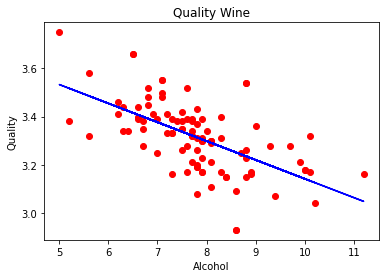

In [374]:
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_train, model.predict(X_train), color = 'blue') 
plt.title('Quality Wine') 
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

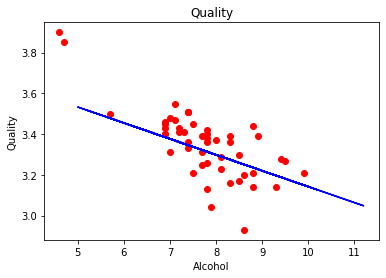

In [375]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

In [376]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [377]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Desepeño de cross-validation con 5 volúmenes:", cv_scores.mean())

Desepeño de cross-validation con 5 volúmenes: 0.2493263388781523
